In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [5]:
# Data Source: 
# https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download
df = pd.read_csv("Netflix TV Shows and Movies.csv")
df.drop(["id", "description", "age_certification", "imdb_id"], axis=1, inplace=True)
df.head()

,index,title,type,release_year,runtime,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,1976,113,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,1975,91,8.2,530877.0
2,2,Life of Brian,MOVIE,1979,94,8.0,392419.0
3,3,The Exorcist,MOVIE,1973,133,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,1969,30,8.8,72895.0


## Do movies on Netflix with an older release years have a better average IMDb ratings?

In [55]:
movies_df = df[df["type"] == "MOVIE"]
movies_df_mean = movies_df.groupby("release_year")["imdb_score"].mean()

r, p = pearsonr(movies_df_mean.index, movies_df_mean)
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r:.2f}, p = {p:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.44, p = 0.0003.


## Do shows on Netflix with an older release years have a better average IMDb ratings?

In [68]:
shows_df = df[df["type"] == "SHOW"]
shows_df_mean = shows_df.groupby("release_year")["imdb_score"].mean()

r, p = pearsonr(shows_df_mean.index, shows_df_mean)
print(f"No relationship between the release year and the IMDb ratings  were found for Netflix shows, r = {r:.2f}, p = {p:.4f}.")

There was no relationship between the release year and the IMDb ratings found for Netflix shows, r = 0.01, p = 0.9563.


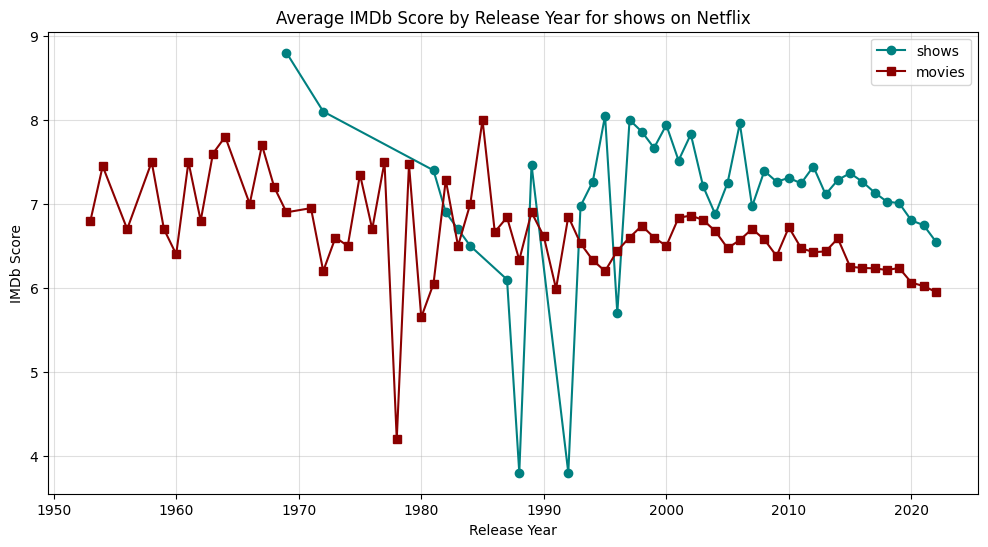

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(
    shows_df_mean.index,
    shows_df_mean,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_df_mean.index,
    movies_df_mean,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.title("Average IMDb Score by Release Year for shows on Netflix")
plt.grid(True, alpha=.4)
plt.legend()
#1978 only one movie "Bandie"

<Axes: xlabel='imdb_score', ylabel='imdb_votes'>

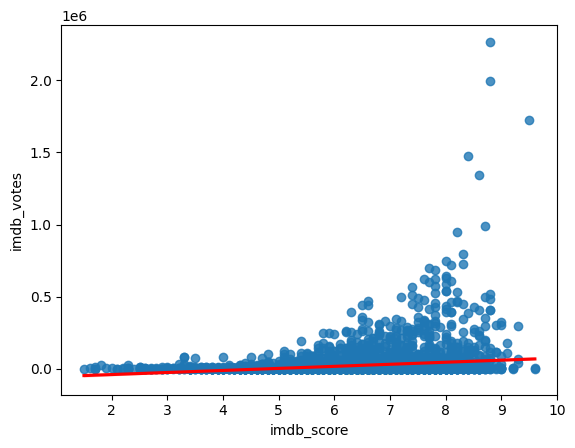

In [54]:

sns.regplot(x="imdb_score", y="imdb_votes", data=df, line_kws={"color":"red"})
